# Sentiment Analysis

In [1]:
!gdown --id 1Pjr69ChG81L2KEQLPs-dA6eW4RUCkBsD

Downloading...
From: https://drive.google.com/uc?id=1Pjr69ChG81L2KEQLPs-dA6eW4RUCkBsD
To: /content/PA4_dataset.zip
100% 322k/322k [00:00<00:00, 46.5MB/s]


In [2]:
!unzip PA4_dataset.zip

Archive:  PA4_dataset.zip
  inflating: PA4_dataset/stop_words.txt  
  inflating: PA4_dataset/test.csv    
  inflating: PA4_dataset/train.csv   


In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


## Data Cleaning and Feature Engineering

In [2]:

df_training = pd.read_csv('PA4_dataset/train.csv')
x_training = df_training['Tweet']
y_training = df_training['Sentiment']



with open('PA4_dataset/stop_words.txt', 'r') as f:
  stop_words = f.read().splitlines()  #this reads the stop words from the text file

for i, row in x_training.iteritems(): #to lower case all words
  x_training.at[i] = row.lower()
  
for i, row in x_training.iteritems():
  x_training.at[i] = re.sub('@\w+', '', row) #to remove @ and whatever comes after/usernames

for i, row in x_training.iteritems():
  x_training.at[i] = re.sub('(?:\s)http[^, ]*', '', row) #to remove hyperlinks

for i, row in x_training.iteritems():
    x_training.at[i] = re.sub("[^\w\d'\s]",' ', row)  #to remove unnecessary punctuations


words = '|'.join(r"\b{}\b".format(x) for x in stop_words)
x_training = x_training.str.replace(words, '') #to remove stop words






In [3]:

vocabulary = []
for i, row in x_training.iteritems():
  words = x_training[i].split()
  for x in words:
    if x not in vocabulary:
     vocabulary.append(x)

bow = np.zeros((x_training.size, len(vocabulary))) #bag of words. stores the frequency of each word in each tweet

for i, row in x_training.iteritems():
  words = x_training[i].split()
  for x in words:
    bow[i][vocabulary.index(x)] += 1


## Logistic Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()


[-4.85599537e+03 -9.89526732e+00 -9.59812230e+01 ... -9.89549251e-01
 -9.89514940e-01  5.92026740e-04]
[-4.51919406e+03 -3.95452081e+00 -9.30080338e+01 ...  5.52384909e-04
 -9.89480363e-01 -9.89463892e-01]
[ 3.57959566e+03  3.95294144e+00  8.90317743e+01 ... -6.83085605e-04
  9.89304054e-01 -8.63610641e-04]


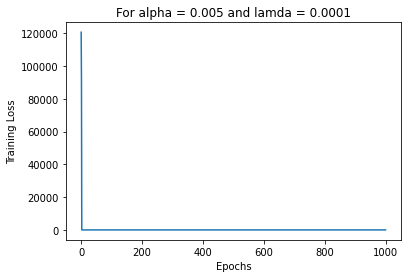

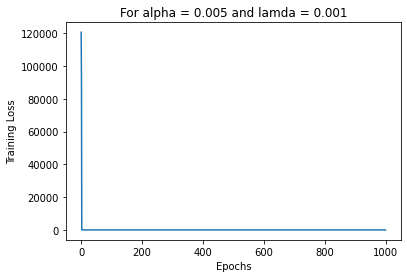

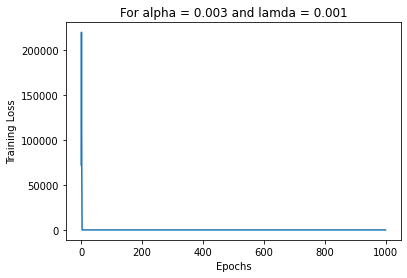

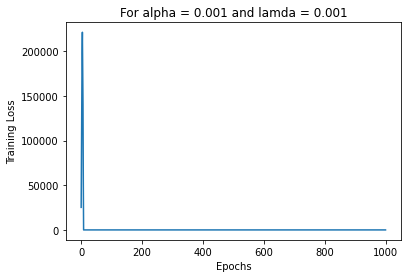

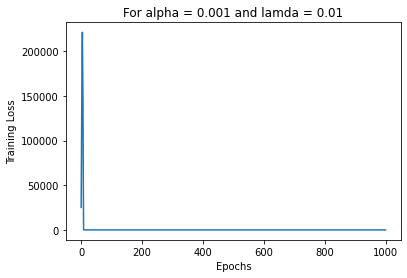

In [44]:
#Task 3

def Sigmoid(x, theta): #used to calculate probability using the sigmoid formula
  r = np.matmul(x, np.transpose(theta))
  result = 1/(1+ np.exp(r))
  return result


def Loss(x,y,lamda, theta): #used to calculate loss using the loss formula
  s = Sigmoid(x, theta)
  loss = - ( np.matmul(y, np.log(s, where = s>0))  + np.matmul( (1-y) , np.log(1 - s , where = s<1) ) )
  return loss


def BGD(alpha, lamda, x,y): #batch gradient descent
  theta = np.zeros(x.shape[1])
  ce_loss = np.array([])

  for epochs in range(1000):
    update_theta = alpha * ( (np.matmul(np.transpose(x), Sigmoid(x,theta) - y)) + (2*lamda*theta))
    theta = theta - update_theta
    theta = theta.astype('float64')  #to ensure theta is of type float and not of type object
    ce_loss = np.append(ce_loss, Loss(x,y,lamda, theta))

  return theta, ce_loss



bow_logistic = bow #create a bag of words for logistic regression case so we can add bias term
insert_ones = np.ones(bow_logistic.shape[0])
bow_logistic = np.insert(bow_logistic, 0, insert_ones, axis=1)

alpha = [0.005, 0.005, 0.003, 0.001, 0.001]
lamda = [0.0001, 0.001, 0.001, 0.001, 0.01]


theta_positive_list = []
theta_negative_list = []
theta_neutral_list = []
loss_positive_list = []
loss_negative_list = []
loss_neutral_list = []

y = np.array([])
for i, row in y_training.iteritems(): #positives are assigned 1 and the rest are assigned 0 label
  if (row == "positive"):
    y = np.append(y,1)
  else:
    y = np.append(y,0)

for i in range(len(alpha)): #run for different alpha and lamda and store theta and loss
  theta_positive, loss_positive = BGD(alpha[i], lamda[i], bow_logistic, y)
  theta_positive_list.append(theta_positive)
  loss_positive_list.append(loss_positive)


y = np.array([])
for i, row in y_training.iteritems():
  if (row == "neutral"):
    y = np.append(y,1)
  else:
    y = np.append(y,0)

for i in range(len(alpha)):
  theta_neutral, loss_neutral = BGD(alpha[i], lamda[i], bow_logistic, y)
  theta_neutral_list.append(theta_neutral)
  loss_neutral_list.append(loss_neutral)


y = np.array([])
for i, row in y_training.iteritems():
  if (row == "negative"):
    y = np.append(y,1)
  else:
    y = np.append(y,0)

for i in range(len(alpha)):
  theta_negative, loss_negative = BGD(alpha[i], lamda[i], bow_logistic, y)
  theta_negative_list.append(theta_negative)
  loss_negative_list.append(loss_negative)


print(theta_positive)
print(theta_neutral)
print(theta_negative)
epochs = np.arange(1000)

for i in range (len(loss_positive_list)):

  total_loss = np.add(loss_positive_list[i], loss_neutral_list[i], loss_negative_list[i])

  plt.plot(epochs, total_loss)
  plt.xlabel("Epochs")
  plt.ylabel("Training Loss")
  t = 'For alpha = ' + str(alpha[i]) + ' and lamda = ' + str(lamda[i])
  plt.title(t)
  plt.show()




In [41]:
def Prediction(x, theta_positive, theta_neutral, theta_negative):
  results = []
  results.append(Sigmoid(x, theta_positive)) # we find probability of each using its respective thetas
  results.append(Sigmoid(x, theta_neutral))
  results.append(Sigmoid(x, theta_negative))

  if (results.index(max(results)) == 1):
    return "neutral"

  if (results.index(max(results)) == 0):
    return "positive"

  if (results.index(max(results)) == 2):
    return "negative"


def Evaluation(y_actual, y_predicted):
  confusion_matrix = np.zeros((3,3))

  for i in range(len(y_predicted)):
    if (y_predicted[i] == "positive") and (y_actual[i] == "positive"):
      confusion_matrix[0][0] += 1 
    elif (y_predicted[i] == "positive") and (y_actual[i] == "neutral"):
      confusion_matrix[0][1] += 1 
    elif (y_predicted[i] == "positive") and (y_actual[i] == "negative"):
      confusion_matrix[0][2] += 1 

    elif (y_predicted[i] == "neutral") and (y_actual[i] == "positive"):
      confusion_matrix[1][0] += 1 
    elif (y_predicted[i] == "neutral") and (y_actual[i] == "neutral"):
      confusion_matrix[1][1] += 1 
    elif (y_predicted[i] == "neutral") and (y_actual[i] == "negative"):
      confusion_matrix[1][2] += 1 
    
    elif (y_predicted[i] == "negative") and (y_actual[i] == "positive"):
      confusion_matrix[2][0] += 1 
    elif (y_predicted[i] == "negative") and (y_actual[i] == "neutral"):
      confusion_matrix[2][1] += 1 
    elif (y_predicted[i] == "negative") and (y_actual[i] == "negative"):
      confusion_matrix[2][2] += 1

  precision = []
  recall = []
  f1 = []
  for i in range(3):
    row_sum = np.sum(confusion_matrix, axis = 1)
    column_sum = np.sum(confusion_matrix, axis = 0)
    precision.append(confusion_matrix[i][i] / row_sum[i])
    recall.append(confusion_matrix[i][i] / column_sum[i])
    f1.append(2*precision[i]*recall[i] / (precision[i] + recall[i]))

  f1_s = (f1[0] +f1[1] + f1[2])/3

  classification_accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[2][2]) / y_actual.size

  return confusion_matrix, f1_s, classification_accuracy



df_test = pd.read_csv('PA4_dataset/test.csv')
x_test = df_test['Tweet']
y_test = df_test['Sentiment']

for i, row in x_test.iteritems(): #lower all words
  x_test.at[i] = row.lower()

for i, row in x_test.iteritems():
    x_test.at[i] = re.sub("[^\w\d'\s]",' ', row) #remove all punctuation except for '


bow_test = np.zeros((x_test.size, len(vocabulary))) #create bag of words for test data

for i, row in x_test.iteritems():
  words = x_test[i].split()
  for x in words:
    if x in vocabulary:
      bow_test[i][vocabulary.index(x)] += 1

bow_logistic_test = bow_test  #create bag of words of test data for logistic case so we can add bias term
insert_ones = np.ones(bow_logistic_test.shape[0])
bow_logistic_test = np.insert(bow_logistic_test, 0, insert_ones, axis=1)

y_predicted = []

for i in range(bow_test.shape[0]): #get the prediction for each data point
  y_predicted.append(Prediction(bow_logistic_test[i], theta_positive_list[4], theta_neutral_list[4], theta_negative_list[4])) 

confusion_matrix, f1_s, classification_accuracy = Evaluation(y_test, y_predicted)
print("Confusion Matrix: ", confusion_matrix)
print("F1 score: " , f1_s)
print("Classification Accuracy: ", classification_accuracy)


Confusion Matrix:  [[239. 301. 924.]
 [  0.   0.   0.]
 [  0.   0.   0.]]
F1 score:  nan
Classification Accuracy:  0.16325136612021857


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


In [47]:

logistic_reg = LogisticRegression(multi_class = 'ovr')
y = np.zeros((y_training.size))

for i, row in y_training.iteritems(): #assign labels
  if (row == "positive"):
    y[i] = 1
  elif (row == "neutral"):
    y[i] = 0
  elif(row == "negative"):
    y[i] = -1


logistic_reg.fit(bow, y)
predictions = logistic_reg.predict(bow_test)

y = np.zeros((y_test.size))

for i, row in y_test.iteritems():
  if (row == "positive"):
    y[i] = 1
  elif (row == "neutral"):
    y[i] = 0
  elif(row == "negative"):
    y[i] = -1

confusion_matrix = metrics.confusion_matrix(y, predictions)
f1_score = metrics.f1_score(y, predictions, average = 'macro')
classification_accuracy = metrics.accuracy_score(y, predictions)

print("Confusion Matrix: ", confusion_matrix)
print("F1 score: ", f1_score)
print("Classification Accuracy: ", classification_accuracy)

Confusion Matrix:  [[817  75  32]
 [127 132  42]
 [ 35  34 170]]
F1 score:  0.6832209547293999
Classification Accuracy:  0.764344262295082


## Naive Bayes

In [43]:

#first is positive, second is neutral and third is negative
prior_probability = [0,0,0]
positive_indices = []
neutral_indices = []
negative_indices = []
for i,row in y_training.iteritems(): #count the number of docs in each class and the indices where each class docs are found in the training set
  if (row == "positive"): 
    prior_probability[0] += 1
    positive_indices.append(i)
  elif (row == "neutral"):
    prior_probability[1] += 1
    neutral_indices.append(i)
  elif(row == "negative"):
    prior_probability[2] += 1
    negative_indices.append(i)

prior_probability[0] = prior_probability[0]/y_training.size
prior_probability[1] = prior_probability[1]/y_training.size
prior_probability[2] = prior_probability[2]/y_training.size


likelihood = np.zeros((3,len(vocabulary))) 

for i in range(len(vocabulary)): #calculate likelihood of each word for each class
  for j in positive_indices:
    likelihood[0][i] = likelihood[0][i] + bow[j][i]

  for j in neutral_indices:
    likelihood[1][i] = likelihood[1][i] + bow[j][i]

  for j in negative_indices:
    likelihood[2][i] = likelihood[2][i] + bow[j][i]

row_sum = np.sum(likelihood, axis = 1)
likelihood[0] = (likelihood[0] + 1) / (row_sum[0] + len(vocabulary))
likelihood[1] = (likelihood[1] + 1) / (row_sum[1] + len(vocabulary))
likelihood[2] = (likelihood[2] + 1) / (row_sum[2] + len(vocabulary))



y_predicted = []

for i,row in x_test.iteritems(): #for each test point we calculate its probability of belonging to each class then take the class with highest probability
  sum = [math.log(prior_probability[0]), math.log(prior_probability[1]), math.log(prior_probability[2])]
  words = x_test[i].split()
  for x in words:
    if x in vocabulary:
      j = vocabulary.index(x)
      sum[0] += math.log(likelihood[0][j])
      sum[1] += math.log(likelihood[1][j])
      sum[2] += math.log(likelihood[2][j])

  if (sum.index(max(sum)) == 0):
    y_predicted.append("positive") 
  elif (sum.index(max(sum)) == 1):
    y_predicted.append("neutral") 
  elif (sum.index(max(sum)) == 2):
    y_predicted.append("negative") 


confusion_matrix, f1_score, classification_accuracy = Evaluation(y_test, y_predicted)
print("Confusion Matrix: ", confusion_matrix)
print("F1 score: " , f1_score)
print("Classification Accuracy: ", classification_accuracy)


Confusion Matrix:  [[141.  35.  26.]
 [ 22. 104.  49.]
 [ 76. 162. 849.]]
F1 score:  0.6402622046663851
Classification Accuracy:  0.7472677595628415


In [53]:

NB_classifier = MultinomialNB()

y = np.zeros((y_training.size))

for i, row in y_training.iteritems():
  if (row == "positive"):
    y[i] = 1
  elif (row == "neutral"):
    y[i] = 0
  elif(row == "negative"):
    y[i] = -1


NB_classifier.fit(bow, y)
predictions = NB_classifier.predict(bow_test)


y = np.zeros((y_test.size))

for i, row in y_test.iteritems():
  if (row == "positive"):
    y[i] = 1
  elif (row == "neutral"):
    y[i] = 0
  elif(row == "negative"):
    y[i] = -1


confusion_matrix = metrics.confusion_matrix(y, predictions)
f1_score = metrics.f1_score(y, predictions, average = 'macro')
classification_accuracy = metrics.accuracy_score(y, predictions)

print("Confusion Matrix: ", confusion_matrix)
print("F1 score: ", f1_score)
print("Classification Accuracy: ", classification_accuracy)


Confusion Matrix:  [[849  49  26]
 [162 104  35]
 [ 76  22 141]]
F1 score:  0.640262204666385
Classification Accuracy:  0.7472677595628415


## Comparison of Results:
We can see that the f1 score and classification accuracy for the logistic regression case are almost similar to the ones for the naive bayes algorithm. This is because, as we learned in class, both of them perform similarly under the similar conditions, which is conditional independence between the features of the data. However, logistic regression performs a little better because it does make a naive assumption, like the naive bayes classifier and so is more accurate